<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Introducción a SymPy

![](http://sympy.org/static/images/logo.png)

__SymPy es una biblioteca de Python para matemática simbólica__.  
Apunta a convertirse en un __S__istema de __A__lgebra __C__omputacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible para manterlo comprensible y fácilmente extensible.  

SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_ Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software privativos y pagos. 

Veremos cómo:

* Crear símbolos y expresiones.
* Manipular expresiones (simplificación, expansión...)
* Calcular derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolción de EDOs.
* Matrices

Sin embargo, SymPy no acaba aquí ni mucho menos...

## Documentación & SymPy Live Shell

from IPython.display import HTML
http://docs.sympy.org/latest/index.html

## SymPy Gamma

https://www.sympygamma.com/input/?i=integrate (1/(1 + x^2))

$$\int \frac{1}{x^{2} + 1}\, dx$$

https://www.sympygamma.com/input/

$$\int \left(x^{2} + 5\right)\, dx = \frac{x^{3}}{3} + 5 x$$

## Creación de símbolos

Lo primero, como siempre, es importar aquello que vayamos a necesitar. La manera usual de hacerlo con SymPy es importar la función `init_session`:
```
from sympy import init_session
init_session(use_latex=True)```

 Esta función ya se encarga de importar todas las funciones básicas y preparar las salidas gráficas. Sin embargo, en este momento, esta función se encuentra en mantenimiento para su uso dentro de los notebooks por lo que activaremos la salida gráfica e importaremos las funciones de la manera usual. Puedes consultar el estado de la corrección en: https://github.com/sympy/sympy/pull/13300 y https://github.com/sympy/sympy/issues/13319 .

El comando `init_session` llevaría a cabo algunas acciones por nostros:

* Gracias a `use_latex=True` obtenemos la salida en $\LaTeX$.
* __Crea una serie de variables__ para que podamos ponernos a trabajar en el momento.

Estas capacidades volverán a estar disponibles cuando el problema se corrija.

In [172]:
#from sympy import *
#init_printing()
from sympy import init_printing
from sympy import init_session

# init_session(use_latex=True)

In [173]:
# init_session(use_latex=True)

In [174]:
init_printing(use_unicode=True)

In [175]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, sec, cosh, sinh, tanh, simplify, expand, factor, collect,
                   apart, cancel, expand_trig,trigsimp, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N, Limit)

In [176]:
from sympy import oo 

<div class="alert warning-info"><strong>Nota:</strong> 
En Python, no se declaran las variables, sin embargo, no puedes usar una hasta que no le hayas asignado un valor. Si ahora intentamos crear una variable `a` que sea `a = 2 * b`, veamos qué ocurre:
</div>

Intentamos usar un símbolo que no hemos creado

In [6]:
a = 2 * b
a

NameError: name 'b' is not defined

In [177]:
b = symbols('b')
a = 2*b
type(a)

sympy.core.mul.Mul

Como en `b` no había sido creada, Python no sabe qué es `b`.

Esto mismo nos ocurre con los símbolos de SymPy. 

__Antes de usar una variable, debo decir que es un símbolo y asignárselo:__

Creamos el símbolo a

In [9]:
a = symbols('a')
a

Número pi

In [10]:
(a + pi) ** 2

Unidad imaginaria de los números complejos

In [11]:
a + 2 * I

El número e

In [12]:
E

Analicemos qué tipo de variable es `a`

In [13]:
type(a)

sympy.core.symbol.Symbol

Ahora ya podría crear `b = 2 * a`:

In [22]:
b = 2 * a
b

In [14]:
type(b)

sympy.core.symbol.Symbol

¿Qué está ocurriendo? Python detecta que `a` es una variable de tipo `Symbol` y al multiplicarla por `2` devuelve una variable de `Sympy`.

Como `Python` permite que el tipo de una variable cambie, __si ahora le asigno a `a` un valor float deja de ser un símbolo.__

In [15]:
a = 2.26492
a

In [16]:
type(a)

float

---
__Las conclusiones son:__

* __Si quiero usar una variable como símbolo debo crearla previamente.__
* Las operaciones con símbolos devuelven símbolos.
* Si una variable que almacenaba un símbolo recibe otra asignación, cambia de tipo.

---

__Las variables de tipo `Symbol` actúan como contenedores en los que no sabemos qué hay (un real, un complejo, una lista...)__. Hay que tener en cuenta que: __una cosa es el nombre de la variable y otra el símbolo con el que se representa__.

Creación de símbolos

In [17]:
coef_traccion = symbols('c_T')
coef_traccion

 Diferencia entre variable y símbolo.  
 
 Incluso puedo hacer cosas raras como:

In [18]:
#
a = symbols('b')
a

Además, se pueden crear varios símbolos a la vez:

In [21]:
x, y, z, t = symbols('x y z t')

y símbolos griegos:

In [30]:
w = symbols('omega')
W = symbols('Omega')
w, W

![](../images/simplification_sympy.png)
_Fuente: Documentación oficial de SymPy_

__Por defecto, SymPy entiende que los símbolos son números complejos__.  
Esto puede producir resultados inesperados ante determinadas operaciones como, por ejemplo, los logaritmos.  
__Podemos indicar que la variable es real, entera... en el momento de la creación__:

Creamos símbolos reales

In [31]:
x, y, z, t = symbols('x y z t', real = True)

Podemos ver las asunciones de un símbolo

In [32]:
x.assumptions0

{'real': True,
 'commutative': True,
 'finite': True,
 'extended_real': True,
 'imaginary': False,
 'complex': True,
 'hermitian': True,
 'infinite': False}

In [33]:
s = symbols('s', complex = True)

In [34]:
s.assumptions0

{'complex': True, 'commutative': True, 'finite': True, 'infinite': False}

In [35]:
n = symbols('n', integer= True)
n.assumptions0

{'integer': True,
 'commutative': True,
 'finite': True,
 'transcendental': False,
 'extended_real': True,
 'rational': True,
 'imaginary': False,
 'complex': True,
 'real': True,
 'hermitian': True,
 'irrational': False,
 'algebraic': True,
 'noninteger': False,
 'infinite': False}

## Expresiones

Comencemos por crear una expresión como: $\cos(x)^2+\sin(x)^2$

In [22]:
expr = cos(x)**2 + sin(x)**2
expr

### Simplificar
### `simplify()`

Podemos pedirle que simplifique la expresión anterior:

In [23]:
simplify(expr)

En este caso parece estar claro lo que quiere decir más simple, pero como en cualquier _CASO_ el comando `simplify` puede no devolvernos la expresión que nosotros queremos. Cuando esto ocurra necesitaremos usar otras instrucciones.

### Substituir
### `.subs()`

En algunas ocasiones necesitaremos sustituir una variable por otra, por otra expresión o por un valor.

In [24]:
expr

Sustituimos x por $y^2$

In [39]:
expr.subs(x, y**2)
expr

¡Pero la expresión no cambia! No hay cambio de variables 

In [25]:
expr

Para que cambie la expresión y se realize el cambio de variables 

In [26]:
expr2 = expr.subs(x, y**2)
expr2

Cambiar el `sin(x)` por `exp(x)`

In [27]:
expr.subs(sin(x), exp(x))
expr

In [28]:
expr3 = expr.subs(sin(x), exp(x))
expr3

Evaluar la expresión $sin(x) + 3 x $, en $x = \pi$

In [31]:
expr4= (sin(x) + 3 * x).subs(x, pi/2)
expr4

__Aunque si lo que queremos es obtener el valor numérico lo mejor es `.evalf(r)`__ con `r` dígitos

In [33]:
(sin(x) + 3 * x).subs(x, pi).evalf(70)

Ver pi con 100 decimales

In [35]:
pi.evalf(200)

El mismo resultado se obtiene con la función N()

In [37]:
N(pi,100)

In [38]:
N(E,100)

# Simplificación

SymPy ofrece numerosas funciones para __simplificar y manipular expresiones__. Entre otras, destacan:

* `expand()`
* `factor()`
* `collect()`
* `apart()`
* `cancel()`

Puedes consultar en la documentación de SymPy lo que hace cada una y algunos ejemplos.  
__Existen también funciones específicas de simplificación para funciones trigonométricas, potencias y logaritmos.__

En [esta documentación](http://docs.sympy.org/latest/tutorial/simplification.html) lo podras ver.

##### Ejemplos

Veamos unos ejemplos vinculados con el manejor de expresiones:

__Crear las expresiones de la izquierda y averiguar qué función obtiene la de la derecha:__

expresión 1| expresión 2
:------:|:------:
$\left(x^{3} + 3 y + 2\right)^{2}$    |    $x^{6} + 6 x^{3} y + 4 x^{3} + 9 y^{2} + 12 y + 4$
$\frac{\left(3 x^{2} - 2 x + 1\right)}{\left(x - 1\right)^{2}} $ | $3 + \frac{4}{x - 1} + \frac{2}{\left(x - 1\right)^{2}}$
$x^{3} + 9 x^{2} + 27 x + 27$         |    $\left(x + 3\right)^{3}$
$\sin(x+2y)$                          |    $\left(2 \cos^{2}{\left (y \right )} - 1\right) \sin{\left (x \right )} + 2 \sin{\left (y \right )} \cos{\left (x \right )} \cos{\left (y \right )}$


1er ejemplo
### `expand()` como método
 expand() es una de lasfunciones de simplificación en  SymPy, usada para expandir expresiones polinomiales

In [39]:
expr1 = (x ** 3 + 3 * y + 2) ** 2
expr1

In [40]:
expr1_exp = expr1.expand()
expr1_exp

In [41]:
a,b=symbols('a b') 
((a+b)**2).expand()

2do  ejemplo
### `apart()` como método

El método sympy.apart() permite descomponer una *función racional* en *fracciónes parciales*  y los pone de la forma  standard i.e p/q.

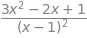

In [140]:
expr2 = (3 * x ** 2 - 2 * x + 1) / (x - 1) ** 2
expr2

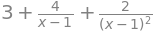

In [141]:
expr2.apart()

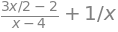

In [44]:
 x, y, z = symbols('x y z')
gfg_exp = 1 / x + (3 * x / 2 - 2)/(x - 4)
gfg_exp 

In [45]:
 gfg_exp.apart()

3er ejemplo
### `factor()` como método
toma un polinomio y factoriza en factores irreducibles sobre los números racionales

In [46]:
expr3 = x ** 3 + 9 * x ** 2 + 27 * x + 27
expr3

In [47]:
expr3.factor()

In [48]:
expr=(x**2*z + 4*x*y*z + 4*y**2*z) 
expr.factor()


4to ejemplo
### `expand()` como función
Es una de las funciones de simplificación más comunes en SymPy. Aunque tiene muchos alcances, por ahora consideraremos su función en la expansión de expresiones polinómicas.

In [49]:
expr4 = sin(x + 2 * y)
expr4

In [54]:
expand(expr4)

In [55]:
expand(sin(x+2*y))

In [57]:
expand((a+b)*(a-b))

In [58]:
a,b=symbols('a b') 
expand((a+b)**2)

### `factor()` como función 
Esta función toma un polinomio y factoriza en factores irreducibles  sobre numeros racionales

In [59]:
x,y,z=symbols('x y z') 
expr=(x**2*z + 4*x*y*z + 4*y**2*z) 
factor(expr)

In [60]:
factor(a**2 - b**2)

5to ejemplo
### `expand_trig()` expansión trigonométrica

In [61]:
print(expr4)

sin(x + 2*y)


In [62]:
expand_trig(expr4)

In [63]:
expand(expr4, trig=True)

## trigsimp()
Para simplificar expresiones usando identidades trigonométricas

In [64]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [65]:
trigsimp(sin(x)*tan(x)/sec(x))

#### trigsimp() también funciona con funciones trigonométricas hyperbólicas

In [66]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [67]:
trigsimp(sinh(x)/tanh(x))

## collect()

Esta función colecta las potencias comunes de un término en una expresión

In [68]:
expr=x*y + x - 3 + 2*x**2 - z*x**2 + x**3 
expr

In [69]:
collect(expr,x)

In [70]:
expr=y**2*x + 4*x*y*z + 4*y**2*z+y**3+2*x*y 
collect(expr,y)

## cancel()

La función cancel() tomará cualquier función racional y la pondrá en la forma canónica estándar, p/q, donde p y q son polinomios expandidos sin factores comunes. Los coeficientes principales de p y q no tienen denominadores, es decir, son números enteros.

In [71]:
expr1=x**2+2*x+1 
expr2=x+1 
cancel(expr1/expr2)

In [73]:
expr1=x**2+2*x+1 
expr2=x+1 
simplify(expr1/expr2)

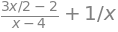

In [74]:
expr = 1/x + (3*x/2 - 2)/(x - 4) 
expr

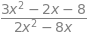

In [75]:
cancel(expr)

In [77]:
expr=1/sin(x)**2 
expr1=sin(x) 
expr1*expr

In [76]:
expr=1/sin(x)**2 
expr1=sin(x) 
cancel(expr1*expr)

# Límites

Calcularemos límites:

## $$\lim_{x\to x_0} f(x)$$

#### Calculemos el siguiente límite:

  ## $$\lim_{x \to 0} \left(\frac{x}{\tan{\left (x \right )}}\right)^{\frac{1}{x^{2}}}$$

Primero creamos la expresión:

In [104]:
x = symbols('x', real=True)
expr = (x / tan(x)) ** (1 / x**2)
expr

In [105]:
x = symbols('x')
expr = (x / tan(x)) ** (1 / x**2)
expr

Obtenemos el límite con la función `limit()` y si queremos dejarlo indicado, podemos usar `Limit()`:

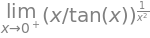

In [106]:
a = Limit(expr, x, 0)
a

Si lo valuamos 

In [107]:
limit(expr, x, 0)

### Calculamos límites por derecha y por izquierda de  la función 

$$ \lim_{x\to 0^-}\frac{1}{x}$$


Supongamos que queremos que nos quede expresado, para ello usamos el comando "Limit" con L mayúscula, 
y luego l minúscula o el comando doit para que calcule el valor del limite :

$$\displaystyle \lim_{x \to 0^+} \frac{1}{x}$$

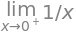

In [105]:
Limit(1/x, x, 0, '+')

In [106]:
limit(1/x, x, 0, '+')

$$\displaystyle \lim_{x \to 0^-} \frac{1}{x}$$

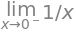

In [107]:
Limit(1/x, x, 0, '-')

In [108]:
limit(1/x, x, 0, '-')

####  Ahora calculamos  
$$\lim_{x\to x_0}\frac{\sin{\left(x \right)}}{x}$$

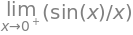

In [109]:
Limit(sin(x)/x,x,0)

In [110]:
limit(sin(x)/x,x,0)

Ahora tomemos la misma ecuación, pero le pidamos que calcule el límite en x que tiende a infinito,
para ello usamos el símbolo oo, es decir:

In [108]:
Limit(sin(x)/x,x,'oo')

In [109]:
limit(sin(x)/x,x,'oo')

Calculamos:

$$ \displaystyle \lim_{x \to 0^+}\left(\frac{\cos{\left(x \right)} - 1}{x}\right)$$

Calculamos límite por derecha 

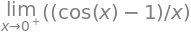

In [110]:
g = Limit((cos(x) - 1)/x, x, 0, '+')
g

In [111]:
g.doit()

Calculamos límite por izquierda 

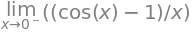

In [112]:
expr2 = Limit((cos(x) - 1)/x, x, 0, '-')
expr2


$$\displaystyle \lim_{x \to 0^+}\left(\frac{\cos{\left(x \right)} - 1}{x}\right)$$

In [113]:
expr2.doit()

### El símbolo $\infty$ se lo expresa con `oo`

In [114]:
Limit( (1/x), x, 'oo')

In [115]:
limit( (1/x), x, 'oo')

### Calculamos otro 
$$\displaystyle \lim_{x \to \infty}\left(x^{2} e^{- x}\right)$$

In [116]:
expr3 = Limit(x**2/exp(x),x, 'oo')
expr3

In [117]:
limit(x**2/exp(x),x,'oo')


#### Otro caso  $$\displaystyle \lim_{x \to 0^+}\left(\frac{1 - x}{x}\right)$$ y 
$$\displaystyle \lim_{x \to 0^-}\left(\frac{1 - x}{x}\right)$$

Observemos que calcula el límite desde la derecha, pues expresa +0.

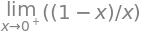

In [118]:
Limit((1-x)/x,x,0,'+')

In [119]:
limit((1-x)/x,x,0,'+')

Observemos que calcula el límite desde la izquierda, pues expresa -0.

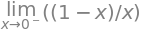

In [120]:
Limit((1-x)/x,x,0,'-')

In [121]:
limit((1-x)/x,x,0,'-')

# Derivadas

Puedes derivar una expresion usando el método `.diff()` y la función `diff()`

Creamos una expresión y obtenemos la derivada primera con *funcion* diff

In [144]:
expr = cos(x)
expr

In [145]:
diff(expr, x)

Utilizando .diff como método

In [146]:
expr.diff(x)

__Segunda derivada__

In [147]:
expr.diff(x, x)

__Tercera derivada__

In [148]:
expr.diff(x, x, x)

__Cuarta derivada__

In [153]:
expr.diff(x, x, x, x)

In [154]:
k = symbols('k')

In [155]:
expo = E**(k*x)

In [156]:
expo.diff(x, x, x)

In [157]:
expr_xy = y ** 3 * sin(x) ** 2 + x ** 2 * cos(y)
expr_xy

In [158]:
diff(expr_xy, x, 1, y, 1)

__Otra forma de expresar las derivadas__

In [ ]:
expr.diff(x, 3)

In [ ]:
expo.diff(x, 3)

__Trabajar con varias variables__  
En este ejemplo, con dos variables $x$ e $y$

In [ ]:
expr_xy = y ** 3 * sin(x) ** 2 + x ** 2 * cos(y)
expr_xy

__Derivada primera__

In [ ]:
diff(expr_xy, x, 1, y, 1)

__Derivada segunda__

In [ ]:
diff(expr_xy, x, 2, y, 2)

__Si queremos que la deje indicada, usamos `Derivative()`__

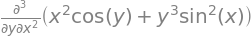

In [160]:
Derivative(expr_xy, x, 2, y)

$$\displaystyle \frac{\partial^{3}}{\partial y\partial x^{2}} \left(x^{2} \cos{\left(y \right)} + y^{3} \sin^{2}{\left(x \right)}\right)$$

## Derivadas  parciales

In [164]:
a=x*sin(x+y)
diff(a,x)

In [165]:
diff(a,y)

La segundo derivada en $x$ y la primera en $y$.

In [166]:
diff(a,x,1,y,1)

In [167]:
diff(a,x,2,y,1)

In [168]:
b = x *cos(x+y) + sin(x+y)
diff(b,y)

Las expresiones con funciones indefinidas pueden ser diferenciadas.

In [178]:
x=symbols('x')
f=Function('x')

In [179]:
a=x*f(x**2)
b=diff(a,x)
b

   2 ⎛ d        ⎞│         ⎛ 2⎞
2⋅x ⋅⎜───(x(ξ₁))⎟│    2 + x⎝x ⎠
     ⎝dξ₁       ⎠│ξ₁=x         

In [180]:
b.doit()

   2 ⎛ d        ⎞│         ⎛ 2⎞
2⋅x ⋅⎜───(x(ξ₁))⎟│    2 + x⎝x ⎠
     ⎝dξ₁       ⎠│ξ₁=x         

#### La función `Derivative` representa una derivada no evaluada. Puede ser evaluada por el método `doit`.

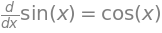

In [181]:
a=Derivative(sin(x),x)
Eq(a,a.doit())

### __Aplicar la regla de la cadena con SymPy__

### Function
Creamos una función F con la palabra "Function"

In [ ]:
F = Function('F')
F(x)

In [ ]:
G = Function('G')
G(x)

- Y aplicamos la regla de la cadena
$$\frac{d}{d x} G{\left (F(x) \right )} $$

### __Derivamos la función compuesta G(F(x))__

In [ ]:
G(F(x)).diff(x)

In [ ]:
En un caso en el que conocemos las funciones:  
definimos una f

In [ ]:
f = 2 * y * exp(x)
f

definimos una g(f)

In [ ]:
g = f **2 * cos(x) + f
g

la derivamos utilizando la regla de la cadena

In [ ]:
diff(g,x)

---